In [69]:
import numpy as np
import pandas as pd
import math
from  scipy.optimize import minimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
data = pd.read_csv('/content/data.txt', header = None)
data = np.array(data)
X = data[:, [0,1]]
y = data[:, [2]]

##Sigmoid Function

In [71]:
def g(z):
    sigm = 1.0/(1.0+np.exp(-z))
    return sigm

In [72]:
X = np.insert(X, 0, values=1, axis=1)
theta = np.zeros((X.shape[1],1))

##Cost function and gradient


In [73]:
in_theta = np.zeros((X.shape[1],1))

In [74]:
def costFunction(theta, x, y):
    m = len(y)
    h_theta = g(x.dot(theta))
    J = (1.0/m)* (((-y).transpose()).dot(np.log(h_theta)) - (1.0 -y.transpose()).dot(np.log(1.0-h_theta)))
    grad = grad = (1.0/m)* x.transpose().dot(h_theta - y)
    #return J, grad
    print ('Cost at theta:', str(J[0,0]))
    print ('Gradient at theta:','\n', str(grad[0,0]),'\n', str(grad[1,0]),'\n', str(grad[2,0]))

In [75]:
costFunction(in_theta, X, y)

Cost at theta: 0.6931471805599453
Gradient at theta: 
 -0.1 
 -12.009216589291153 
 -11.262842205513593


In [76]:
test_theta= np.array([[-24], [0.2], [0.2]])

In [77]:
costFunction(test_theta, X, y)

Cost at theta: 0.2183301938265978
Gradient at theta: 
 0.042902994899534495 
 2.5662341155107584 
 2.646797371082434


In [78]:
def CostFunction(theta, x, y):
    m = len(y)
    h_theta = g(x.dot(theta))
    J = (1.0/m)* (((-y).transpose()).dot(np.log(h_theta)) - (1.0 -y.transpose()).dot(np.log(1.0-h_theta)))
    J = np.float64(J)
    return J


In [79]:
def Gradient(theta, x, y):
  m = len(y)
  n = x.shape[1]
  theta = theta.reshape((n,1))
  h_theta = g(x.dot(theta))
  grad = (1.0/m)* (x.transpose().dot(h_theta - y))
  return grad.flatten()

In [80]:
theta = Result.x
print('Cost at theta:',Result.fun, '\n', 'Theta:', Result.x)

Cost at theta: 0.20349770158947478 
 Theta: [-25.16131857   0.20623159   0.20147149]


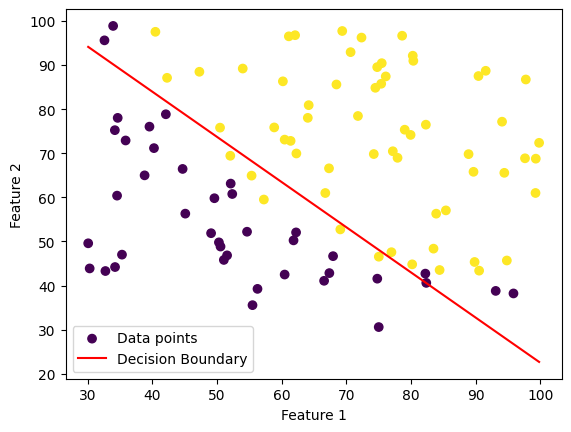

In [81]:
plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), cmap='viridis', label='Data points')

# Plot the decision boundary
x1_values = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x2_values = -(theta[0] + theta[1] * x1_values) / theta[2]

plt.plot(x1_values, x2_values, label='Decision Boundary', color='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

##Evaluating logistic regression


In [82]:
def predict(theta, x):
    m = X.shape[0]
    p = np.zeros((m,1))
    n = X.shape[1]
    theta = theta.reshape((n,1))
    h_theta = g(X.dot(theta))
    for i in range(0, h_theta.shape[0]):
        if h_theta[i] > 0.5:
            p[i, 0] = 1
        else:
            p[i, 0] = 0
    return p

In [83]:
p = predict(theta, X)
print ('Train Accuracy:', (y[p == y].size / float(y.size)) * 100.0)

Train Accuracy: 89.0
